# How does an orbit change if at a certain point, we modify the velocity?

In [2]:
import math
import numpy as np

In [163]:
import rebound

In [164]:
%matplotlib inline

In [315]:
class Orbit():
    
    def __init__(self):
        #self.e_vec = np.array([0, 0, 0])
        #self.h_vec = np.array([0, 0, 0])
        #self.n_vec = np.array([0, 0, 0])
        #self.h = 0
        #self.E = 0
        #self.Omega = 0
        #self.omega = 0
        #self.i = 0
        #self.e = 0
        #self.a = 0
        #self.nu = 0
        #self.Pi = 0
        #self.p = 0
        #self.r_vec = np.array([0, 0, 0])
        #self.v_vec = np.array([0, 0, 0])
        #self.r = 0
        #self.v = 0
        return None
        
    
    def get_params(self):
        params = {
            "a": self.a,
            "e": self.e,
            "i": self.i,
            "Omega": self.Omega,
            "omega": self.omega,
            "e_vec": self.e_vec,
            "h_vec": self.h_vec,
            "n_vec": self.n_vec,
            "nu": self.nu,
            "Pi": self.Pi,
            "h": self.h,
            "r_vec": self.r_vec,
            "r": self.r,
            "v_vec": self.v_vec,
            "v": self.v,
            "E": self.E,
            "p": self.p
        }
        
        return params
        
    
    def transf_peri_geo(self, omega, little_omega, i):
        IdotP = math.cos(omega)*math.cos(little_omega) - math.sin(omega)*math.sin(little_omega)*math.cos(i)
        IdotQ = -math.cos(omega)*math.sin(little_omega) - math.sin(omega)*math.cos(little_omega)*math.cos(i)
        IdotW = math.sin(omega)*math.sin(i)

        JdotP = math.sin(omega)*math.cos(little_omega) - math.cos(omega)*math.sin(little_omega)*math.cos(i)
        JdotQ = -math.sin(omega)*math.sin(little_omega) + math.cos(omega)*math.cos(little_omega)*math.cos(i)
        JdotW = -math.cos(omega)*math.sin(i)

        KdotP = math.sin(little_omega)*math.sin(i)
        KdotQ = math.cos(little_omega)*math.sin(i)
        KdotW = math.cos(i)

        R = np.matrix([[IdotP, IdotQ, IdotW], [JdotP, JdotQ, JdotW], [KdotP, KdotQ, KdotW]])

        return R
    
    
    def constants_of_motion(self):
        r = self.r
        v = self.v
        r_vec = self.r_vec
        v_vec = self.v_vec
        
        self.h_vec = np.cross(r_vec, v_vec)
        self.e_vec = (v**2 - 1./r)*r_vec - (np.dot(r_vec, v_vec))*v_vec
        self.n_vec = np.cross([0,0,1], self.h_vec)
        
        self.h = np.linalg.norm(self.h_vec)
        self.e = np.linalg.norm(self.e_vec)
        self.n = np.linalg.norm(self.n_vec)
        
        self.E = 0.5*v**2 - 1./r
        
        
    
    def from_params(self, a, e, Omega, omega, i, nu):
        self.Omega = Omega
        self.omega = omega
        self.i = i
        self.e = e
        self.a = a
        self.nu = nu
        
        R = self.transf_peri_geo(Omega, omega, i)
        p = a*(1. - e**2)
        r = p/(1+e*math.cos(nu))

        r_peri = np.array([r*math.cos(nu), r*math.sin(nu), 0])
        r_geo = np.squeeze(np.asarray(np.dot(R, r_peri)))

        v_peri = math.sqrt(mu/p)*np.array([-math.sin(nu), e+math.cos(nu), 0])
        v_geo = np.squeeze(np.asarray(R.dot(v_peri)))
        
        self.r_vec = r_geo
        self.v_vec = v_geo
        self.r = np.linalg.norm(self.r_vec)
        self.v = np.linalg.norm(self.v_vec)
        
        self.constants_of_motion()
    
    
    def compute_angles(self):
        i = math.acos(np.dot([0,0,1], self.h_vec)/self.h)
        self.i = i if not np.isnan(i) else 0

        Omega = math.acos(np.dot([1,0,0], self.n_vec)/self.n)
        self.Omega = Omega if not np.isnan(Omega) else 0

        omega = math.acos(np.dot(self.e_vec, self.n_vec)/(self.e * self.n ) )
        self.omega = omega if not np.isnan(omega) else 0
        
        #Longitude of periapsis
        self.Pi = math.acos(self.e_vec[0]/self.e)

    
    
    def from_r_v(self, r_vec, v_vec):
        self.r_vec = r_vec
        self.v_vec = v_vec
        
        self.r = np.linalg.norm(self.r_vec)
        self.v = np.linalg.norm(self.v_vec)
        
        self.constants_of_motion()
        self.compute_angles()
        
        self.nu = math.acos(np.dot(self.e_vec, self.r_vec)/(self.e * self.r))

        

        
    def from_constants_of_motion(self, h_vec, e_vec, n_vec, nu):
        
        self.nu = nu
        self.h_vec = h_vec
        self.e_vec = e_vec
        self.n_vec = n_vec
        
        
        
        self.compute_angles()
        self.from_params(self.a, self.e, self.Omega, self.omega, self.i, self.nu)
        
    
        
        
        
        

In [316]:
orbit = Orbit()
orbit.from_params(2.1, 0.5, 0,0,0, 0.5*math.pi)

In [317]:
orbit.E

-0.23809523809523797

#### Transformation matrix from perifocal to geocentric equatorial

In [4]:
def transf_peri_geo(omega, little_omega, i):
    IdotP = math.cos(omega)*math.cos(little_omega) - math.sin(omega)*math.sin(little_omega)*math.cos(i)
    IdotQ = -math.cos(omega)*math.sin(little_omega) - math.sin(omega)*math.cos(little_omega)*math.cos(i)
    IdotW = math.sin(omega)*math.sin(i)

    JdotP = math.sin(omega)*math.cos(little_omega) - math.cos(omega)*math.sin(little_omega)*math.cos(i)
    JdotQ = -math.sin(omega)*math.sin(little_omega) + math.cos(omega)*math.cos(little_omega)*math.cos(i)
    JdotW = -math.cos(omega)*math.sin(i)

    KdotP = math.sin(little_omega)*math.sin(i)
    KdotQ = math.cos(little_omega)*math.sin(i)
    KdotW = math.cos(i)

    R = np.matrix([[IdotP, IdotQ, IdotW], [JdotP, JdotQ, JdotW], [KdotP, KdotQ, KdotW]])
    
    return R

#### From orbital parameters to position and velocity in geocentric equatorial coordinates

In [7]:
def params_to_pos_vel(a, e,omega, little_omega, i, nu):
    R = transf_peri_geo(omega, little_omega, i)
    p = a*(1. - e**2)
    r = p/(1+e*math.cos(nu))
    
    r_peri = np.array([r*math.cos(nu), r*math.sin(nu), 0])
    r_geo = np.squeeze(np.asarray(np.dot(R, r_peri)))
    
    v_peri = math.sqrt(mu/p)*np.array([-math.sin(nu), e+math.cos(nu), 0])
    v_geo = np.squeeze(np.asarray(R.dot(v_peri)))
    
    return (r_geo, v_geo, )
                        

#### From position and velocity to orbital parameters

In [180]:
def pos_vel_to_params(r_geo, v_geo):
    r = np.linalg.norm(r_geo)
    v = np.linalg.norm(v_geo)
    
    h_geo = np.cross(r_geo, v_geo)
    e_geo = (v**2 - 1./r)*r_geo - (np.dot(r_geo, v_geo))*v_geo
    n_geo = np.cross([0,0,1], h_geo)
    
    h_mod = np.linalg.norm(h_geo)
    e_mod = np.linalg.norm(e_geo)
    n_mod = np.linalg.norm(n_geo)
    
    v_mod = np.linalg.norm(v_geo)
    r_mod = np.linalg.norm(r_geo)
    
    
    i = math.acos(np.dot([0,0,1], h_geo)/h_mod)
    i = i if not np.isnan(i) else 0
    
    omega = math.acos(np.dot([1,0,0], n_geo)/n_mod)
    omega = omega if not np.isnan(omega) else 0
    
    little_omega = math.acos(np.dot(e_geo, n_geo)/(e_mod * n_mod ) )
    little_omega = little_omega if not np.isnan(little_omega) else 0
    
    nu = math.acos(np.dot(e_geo, r_geo)/(e_mod*r_mod))
    
    #Longitude of periapsis
    Pi = math.acos(e_geo[0]/e_mod)
    
    
    l_not = Pi + nu
    
    
    p = np.linalg.norm(h_geo)**2
    a = p/(1.-e_mod**2)
    
    angles_degrees = {
        "i": i,
        "omega": omega,
        "little_omega": little_omega,
        "nu": nu,
        "Pi": Pi,
        "l_not": l_not
    }
    
    angles_degrees = {k : v*180/math.pi for k,v in angles_degrees.iteritems()}
    
    params = {"h_geo": h_geo,
             "e_geo": e_geo,
             "n_geo": n_geo,
             "i": i,
             "omega": omega,
             "little_omega": little_omega,
             "nu": nu,
             "p": p,
             "e": e_mod,
             "a": a,
             "Pi": Pi,
             "l_not": l_not,
             "angles_degrees": angles_degrees}
    
    return params
                   
                   
    
    
    

#### Constant mu

In [5]:
mu = 1
mu_1 = 3.986004418e+14

#### Orbital parameters


In [223]:
a = 2
e = .5

#Angles in radians!
i = 0
little_omega = 0
omega = 0
nu = 0.5*math.pi

In [224]:
r_ini, v_ini = params_to_pos_vel(a, e,omega, little_omega, i, nu)

In [225]:
r_ini

array([9.18485099e-17, 1.50000000e+00, 0.00000000e+00])

In [226]:
v_ini

array([-0.81649658,  0.40824829,  0.        ])

In [227]:
v_ini_norm = np.linalg.norm(v_ini)

In [228]:
v_ini_norm

0.9128709291752769

In [229]:
params_ini = pos_vel_to_params(r_ini, v_ini)
params_ini

/home/edoardo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/edoardo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


{'Pi': 0.0,
 'a': 1.9999999999999998,
 'angles_degrees': {'Pi': 0.0,
  'i': 0.0,
  'l_not': 90.0,
  'little_omega': 0.0,
  'nu': 90.0,
  'omega': 0.0},
 'e': 0.5,
 'e_geo': array([0.5, 0. , 0. ]),
 'h_geo': array([ 0.        , -0.        ,  1.22474487]),
 'i': 0.0,
 'l_not': 1.5707963267948966,
 'little_omega': 0,
 'n_geo': array([ 0.,  0., -0.]),
 'nu': 1.5707963267948966,
 'omega': 0,
 'p': 1.4999999999999998}

In [263]:
v_fin_geo = 1.2*v_ini

In [264]:
v_fin_geo

array([-0.9797959 ,  0.48989795,  0.        ])

In [265]:
np.cross(v_ini, v_fin_geo)

array([0., 0., 0.])

In [266]:
r_fin_geo = r_ini

In [267]:
params_fin = pos_vel_to_params(r_fin_geo, v_fin_geo)

/home/edoardo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/edoardo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [268]:
params_fin

{'Pi': 0.5485494024505277,
 'a': 7.499999999999991,
 'angles_degrees': {'Pi': 31.429565614838495,
  'i': 0.0,
  'l_not': 90.00000000000001,
  'little_omega': 0.0,
  'nu': 58.57043438516152,
  'omega': 0.0},
 'e': 0.8438009243891592,
 'e_geo': array([0.72, 0.44, 0.  ]),
 'h_geo': array([ 0.        , -0.        ,  1.46969385]),
 'i': 0.0,
 'l_not': 1.5707963267948968,
 'little_omega': 0,
 'n_geo': array([ 0.,  0., -0.]),
 'nu': 1.022246924344369,
 'omega': 0,
 'p': 2.16}

In [269]:
params_to_pos_vel(params_fin["a"], params_fin["e"], params_fin["omega"], params_fin["little_omega"], 
                  params_fin["i"], params_fin["nu"])

(array([0.78217501, 1.27992275, 0.        ]),
 array([-0.58058475,  0.9289356 ,  0.        ]))

In [270]:
r_fin_geo

array([9.18485099e-17, 1.50000000e+00, 0.00000000e+00])

In [271]:
v_fin_geo

array([-0.9797959 ,  0.48989795,  0.        ])

In [272]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-5, e=e, a=a, inc=i, f=nu, Omega=omega, omega=little_omega)
sim.add(m=1e-5, e=params_fin["e"], a=params_fin["a"], inc=params_fin["i"], 
        f=params_fin["nu"], Omega=params_fin["omega"],
       pomega=params_fin["Pi"])

/home/edoardo/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


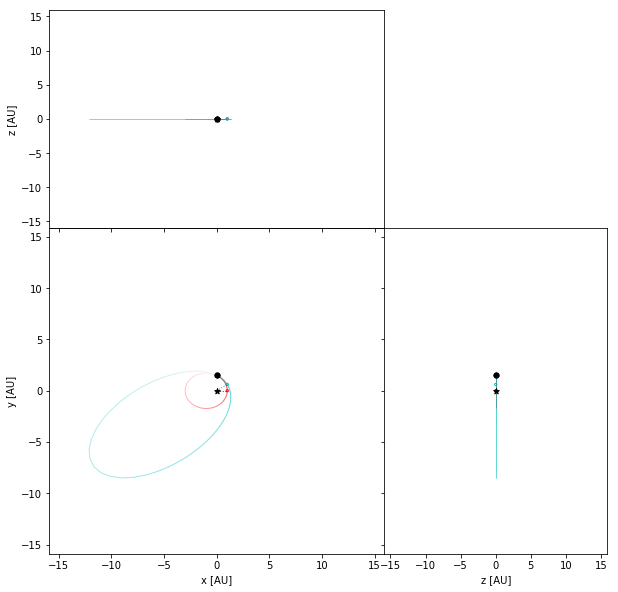

In [274]:
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True, figsize=(10,10), slices=True)